<a href="https://colab.research.google.com/github/YumcoderCom/ml-course-project/blob/main/Post_Transplant_Outcome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = "/content/drive/MyDrive/SRTR/tx_li.csv"
df = pd.read_csv(file_path)

<ipython-input-2-6ca08ee8060a>:3: DtypeWarning: Columns (35,36,38,39,40,88,115,116,122,139,140,153,159,170,192,195,196,201,202,203,204,206,208,210,212,215,219,220,221,227,230,236,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [3]:
print(df.shape)

(136542, 310)


In [4]:
# Define the list of desired values: Inclusion criteria of all patients with diagnosis of Cirrhosis
values = [4200, 4201, 4202, 4203, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4212,
         4213, 4214, 4215, 4216, 4220, 4230, 4231, 4235, 4240, 4241, 4242, 4245]

# Filter the dataframe
df = df[df['REC_DGN'].isin(values)]


In [5]:
print(df.shape)

(95769, 310)


In [6]:
#removing patients younger than 18
df = df[df['REC_AGE_AT_TX'] > 17]


In [7]:
print(df.shape)

(95769, 310)


In [8]:
#removing patients who had previous transplants
df = df[df['CAN_PREV_TX'] != 1]


In [9]:
print(df.shape)

(91139, 310)


In [10]:
#Cleaning the categorical data, and simplyfing them
import pandas as pd

# CAN_ABO
df['CAN_ABO'] = df['CAN_ABO'].replace({'A1': 'A', 'A2': 'A', 'A1B': 'AB', 'A2B': 'AB'})

# CAN_ANGINA
df['CAN_ANGINA'] = df['CAN_ANGINA'].replace({1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 30: 1, 998: 'Unknown'})

# CAN_ANGINA_CAD
df['CAN_ANGINA_CAD'] = df['CAN_ANGINA_CAD'].replace({1: 0, 2: 1, 3: 1, 4: 1, 998: 'Unknown'})

# CAN_DIAB
df['CAN_DIAB'] = df['CAN_DIAB'].replace({1: 0, 2: 1, 3: 1, 4: 1, 998: 'Unknown'})

# CAN_DIAB_TY
df['CAN_DIAB_TY'] = df['CAN_DIAB_TY'].replace({1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 998: 'Unknown'})

# CAN_GENDER
df['CAN_GENDER'] = df['CAN_GENDER'].replace({b'M': 'Male', b'F': 'Female'})

# REC_FUNCTN_STAT
rec_functn_stat_map = {1: 'Needs no assistance', 2080: 'Needs no assistance', 2090: 'Needs no assistance', 2100: 'Needs no assistance',
                       2: 'Needs some assistance', 2070: 'Needs some assistance', 2060: 'Needs some assistance', 2050: 'Needs some assistance',
                       3: 'Needs total assistance', 2040: 'Needs total assistance', 2030: 'Needs total assistance', 2020: 'Needs total assistance', 2010: 'Needs total assistance',
                       998: 'Unknown'}
df['REC_FUNCTN_STAT'] = df['REC_FUNCTN_STAT'].map(rec_functn_stat_map)

# CAN_LAST_ASCITES
df['CAN_LAST_ASCITES'] = df['CAN_LAST_ASCITES'].replace({1: 'No ascites', 2: 'Mild ascites', 3: 'Moderate ascites', 4: 'Unknown'})

# CAN_LAST_ENCEPH
df['CAN_LAST_ENCEPH'] = df['CAN_LAST_ENCEPH'].replace({1: 0, 2: 1, 3: 1, 4: 'Unknown'})

# CAN_PEPTIC_ULCER
df['CAN_PEPTIC_ULCER'] = df['CAN_PEPTIC_ULCER'].replace({1: 0, 2: 1, 3: 1, 4: 1, 998: 'Unknown'})

# CAN_RACE
race_map = {8: 'White', 16: 'Black', 32: 'Native American', 64: 'Asian', 512: 'Indian', 2000: 'Other', 128: 'Other', 256: 'Other'}
df['CAN_RACE'] = df['CAN_RACE'].map(race_map)

# DON_HIST_CANCER
df['DON_HIST_CANCER'] = df['DON_HIST_CANCER'].apply(lambda x: 0 if x == 1 else (1 if x != 998 else 'unknown'))

# DON_HIST_DIAB
df['DON_HIST_DIAB'] = df['DON_HIST_DIAB'].replace({1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 998: 'unknown'})

# DON_HIST_HYPERTEN
df['DON_HIST_HYPERTEN'] = df['DON_HIST_HYPERTEN'].replace({1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 998: 'unknown'})

# DON_TY
df['DON_TY'] = df['DON_TY'].replace({b'C': 0, b'L': 1})

# REC_DGN
rec_dgn_map = {4202: 'Hepatitis B', 4207: 'Hepatitis B', 4204: 'Hepatitis C', 4206: 'Hepatitis B & C', 4216: 'Hepatitis C & Alcohol',
               4212: 'Autoimmune', 4214: 'Fatty Liver', 4215: 'Alcohol', 4220: 'PBC',
               4235: 'PSC', 4240: 'PSC', 4241: 'PSC', 4242: 'PSC', 4245: 'PSC', 4208: 'Cryptogenic', 4213: 'Cryptogenic'}
df['REC_DGN'] = df['REC_DGN'].map(rec_dgn_map).fillna('Others')

# REC_MED_COND
df['REC_MED_COND'] = df['REC_MED_COND'].replace({1: 'Patient needed to be in intensive care unit', 2: 'Patient needed to be in regular hospital room', 3: 'Patient was at home'})

# REC_VENTILATOR
df['REC_VENTILATOR'] = df['REC_VENTILATOR'].replace({0: 'No', 1: 'Yes'})



In [11]:
# Keeping only the variables of interest for prediction
cols_to_keep = [
    'REC_AGE_AT_TX', 'CAN_PREV_TX', 'TFL_DEATH_DT', 'REC_TX_DT', 'TFL_COD', 'CAN_ABO',
    'CAN_ANGINA', 'CAN_ANGINA_CAD', 'CAN_DIAB', 'CAN_DIAB_TY', 'CAN_GENDER', 'REC_FUNCTN_STAT', 'CAN_LAST_ASCITES',
    'CAN_PEPTIC_ULCER', 'CAN_RACE', 'DON_HIST_CANCER', 'DON_HIST_DIAB', 'DON_HIST_HYPERTEN', 'DON_TY',
    'REC_DGN', 'REC_MED_COND', 'REC_VENTILATOR', 'CAN_HGT_CM', 'CAN_LAST_ALBUMIN', 'CAN_LAST_BILI',
    'CAN_LAST_INR', 'CAN_LAST_SERUM_CREAT', 'CAN_LAST_SERUM_SODIUM', 'CAN_WGT_KG', 'DON_AGE_IN_MONTHS',
    'DON_WARM_ISCH_TM_MINS', 'DON_WGT_KG', 'CAN_BACTERIA_PERIT', 'CAN_CEREB_VASC', 'CAN_DRUG_TREAT_COPD',
    'CAN_DRUG_TREAT_HYPERTEN', 'CAN_LAST_DIAL_PRIOR_WEEK', 'REC_INOTROP_BP_SUPPORT', 'REC_MALIG',
    'CAN_PERIPH_VASC', 'CAN_PORTAL_VEIN', 'CAN_PREV_ABDOM_SURG', 'CAN_PULM_EMBOL', 'CAN_TIPSS',
    'DON_MEET_CDC_HIGH_RISK', 'REC_PORTAL_HYPERTEN_BLEED', 'REC_VARICEAL_BLEEDING', 'CAN_LAST_SRTR_LAB_MELD', 'TFL_LAFUDATE'
]

# Drop columns not in the list
df = df[cols_to_keep]


In [12]:
print(df.shape)

(91139, 49)


In [13]:
# Simplifying the causes of death into broader categories
mappings = {
    'Unknown': [998, 2804, 3916, 3917, 4959, 4960, 5816],
    'Other': [999, 3902, 3906, 4940, 4941, 4942, 4945, 4950, 2712, 4615, 4951, 4952, 4953, 4954, 4900, 4910],
    'Graft failure': [2000, 2004, 2099, 3200, 3201, 3204, 3299, 3915, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4610, 4955, 4956, 4957, 4958],
    'Infection': [2100, 2101, 2109, 2112, 2129, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3399, 4800, 4801, 4802, 4803, 4804, 4805, 4806, 4810, 4811, 6755, 6798],
    'Cardiovascular': [2201, 2203, 2209, 3400, 3401, 3499, 4246, 4620, 4621, 4622, 4623, 4624, 4625, 4626],
    'Respiratory failure': [2304, 2305, 2399, 3904, 4640, 4645],
    'Cerebrovascular': [2400, 2401, 2402, 3500, 3599, 4630, 4631, 4635, 4701],
    'GI bleeding': [2501, 3600, 4700, 4702],
    'Bleeding': [3601, 3699, 3901, 4703, 4705, 4706],
    'Malignancy': [2600, 2602, 2699, 3700, 3701, 3702, 3799, 4850, 4851, 4855, 4856, 4860],
    'Liver failure': [2704, 3907],
    'MOF': [2705, 3908, 4660, 5809],
    'PE': [3402, 4247],
    'Trauma': [3800, 3899, 4930, 4935],
    'Renal failure': [3903, 4650, 5805],
    'Suicide': [3905, 4920]
}

# Create a reverse mapping
reverse_mapping = {code: category for category, codes in mappings.items() for code in codes}

# Replace values in TFL_COD column
df['TFL_COD'] = df['TFL_COD'].replace(reverse_mapping)


In [14]:
# Convert the columns to datetime format with explicit DD/MM/YYYY format
df['TFL_DEATH_DT'] = pd.to_datetime(df['TFL_DEATH_DT'], format='%d/%m/%Y')
df['REC_TX_DT'] = pd.to_datetime(df['REC_TX_DT'], format='%d/%m/%Y')
df['TFL_LAFUDATE'] = pd.to_datetime(df['TFL_LAFUDATE'], format='%d/%m/%Y')

# Create the TX_SURV column
df['TX_SURV'] = df.apply(lambda row: (row['TFL_DEATH_DT'] - row['REC_TX_DT']).days if pd.notnull(row['TFL_DEATH_DT'])
                         else (row['TFL_LAFUDATE'] - row['REC_TX_DT']).days, axis=1)


In [15]:
#Cleaning the MELD score: only keeping the last 2 variables
df['CAN_LAST_SRTR_LAB_MELD'] = df['CAN_LAST_SRTR_LAB_MELD'] % 100


In [16]:
df.head()

REC_AGE_AT_TX  CAN_PREV_TX TFL_DEATH_DT  REC_TX_DT         TFL_COD CAN_ABO  \
1             55            0          NaT 2012-11-25             NaN    b'O'   
4             52            0   2019-07-19 2012-12-24  Cardiovascular    b'A'   
5             46            0          NaT 2012-11-06             NaN    b'O'   
6             62            0          NaT 2012-11-26             NaN    b'O'   
7             54            0          NaT 2012-10-20             NaN    b'B'   

  CAN_ANGINA CAN_ANGINA_CAD CAN_DIAB CAN_DIAB_TY  ... CAN_PORTAL_VEIN  \
1        NaN            0.0      NaN         0.0  ...            b'N'   
4        NaN            0.0      NaN         1.0  ...            b'N'   
5        NaN            0.0      NaN         1.0  ...            b'N'   
6        NaN            0.0      NaN         1.0  ...            b'N'   
7        NaN            0.0      NaN         0.0  ...            b'N'   

  CAN_PREV_ABDOM_SURG CAN_PULM_EMBOL CAN_TIPSS DON_MEET_CDC_HIGH_RISK  \
1                b'N'           b'N'      b'N'                   b'N'   
4                b'Y'           b'N'      b'N'                   b'N'   
5                b'Y'           b'N'      b'N'                   b'N'   
6                b'Y'           b'N'      b'Y'                   b'N'   
7                b'Y'           b'N'      b'N'                   b'Y'   

  REC_PORTAL_HYPERTEN_BLEED REC_VARICEAL_BLEEDING CAN_LAST_SRTR_LAB_MELD  \
1                      b'N'                   NaN                   22.0   
4                      b'N'                   NaN                   23.0   
5                      b'N'                   NaN                   27.0   
6                      b'N'                   NaN                    9.0   
7                      b'N'                   NaN                   20.0   

  TFL_LAFUDATE TX_SURV  
1   2022-12-02    3659  
4   2019-07-19    2398  
5   2022-10-03    3618  
6   2022-07-15    3518  
7   2022-09-28    3630  

[5 rows x 50 columns]

In [17]:
#checking missing values
missing_values = df.isnull().sum()
print(missing_values)


REC_AGE_AT_TX                    0
CAN_PREV_TX                      0
TFL_DEATH_DT                 65642
REC_TX_DT                        0
TFL_COD                      65645
CAN_ABO                          0
CAN_ANGINA                   83273
CAN_ANGINA_CAD               56851
CAN_DIAB                     83273
CAN_DIAB_TY                     22
CAN_GENDER                       0
REC_FUNCTN_STAT               2197
CAN_LAST_ASCITES                 1
CAN_PEPTIC_ULCER             48990
CAN_RACE                       443
DON_HIST_CANCER                  0
DON_HIST_DIAB                 4502
DON_HIST_HYPERTEN             4502
DON_TY                           0
REC_DGN                          0
REC_MED_COND                   472
REC_VENTILATOR                   0
CAN_HGT_CM                     189
CAN_LAST_ALBUMIN                 1
CAN_LAST_BILI                    1
CAN_LAST_INR                     1
CAN_LAST_SERUM_CREAT             1
CAN_LAST_SERUM_SODIUM         7302
CAN_WGT_KG          

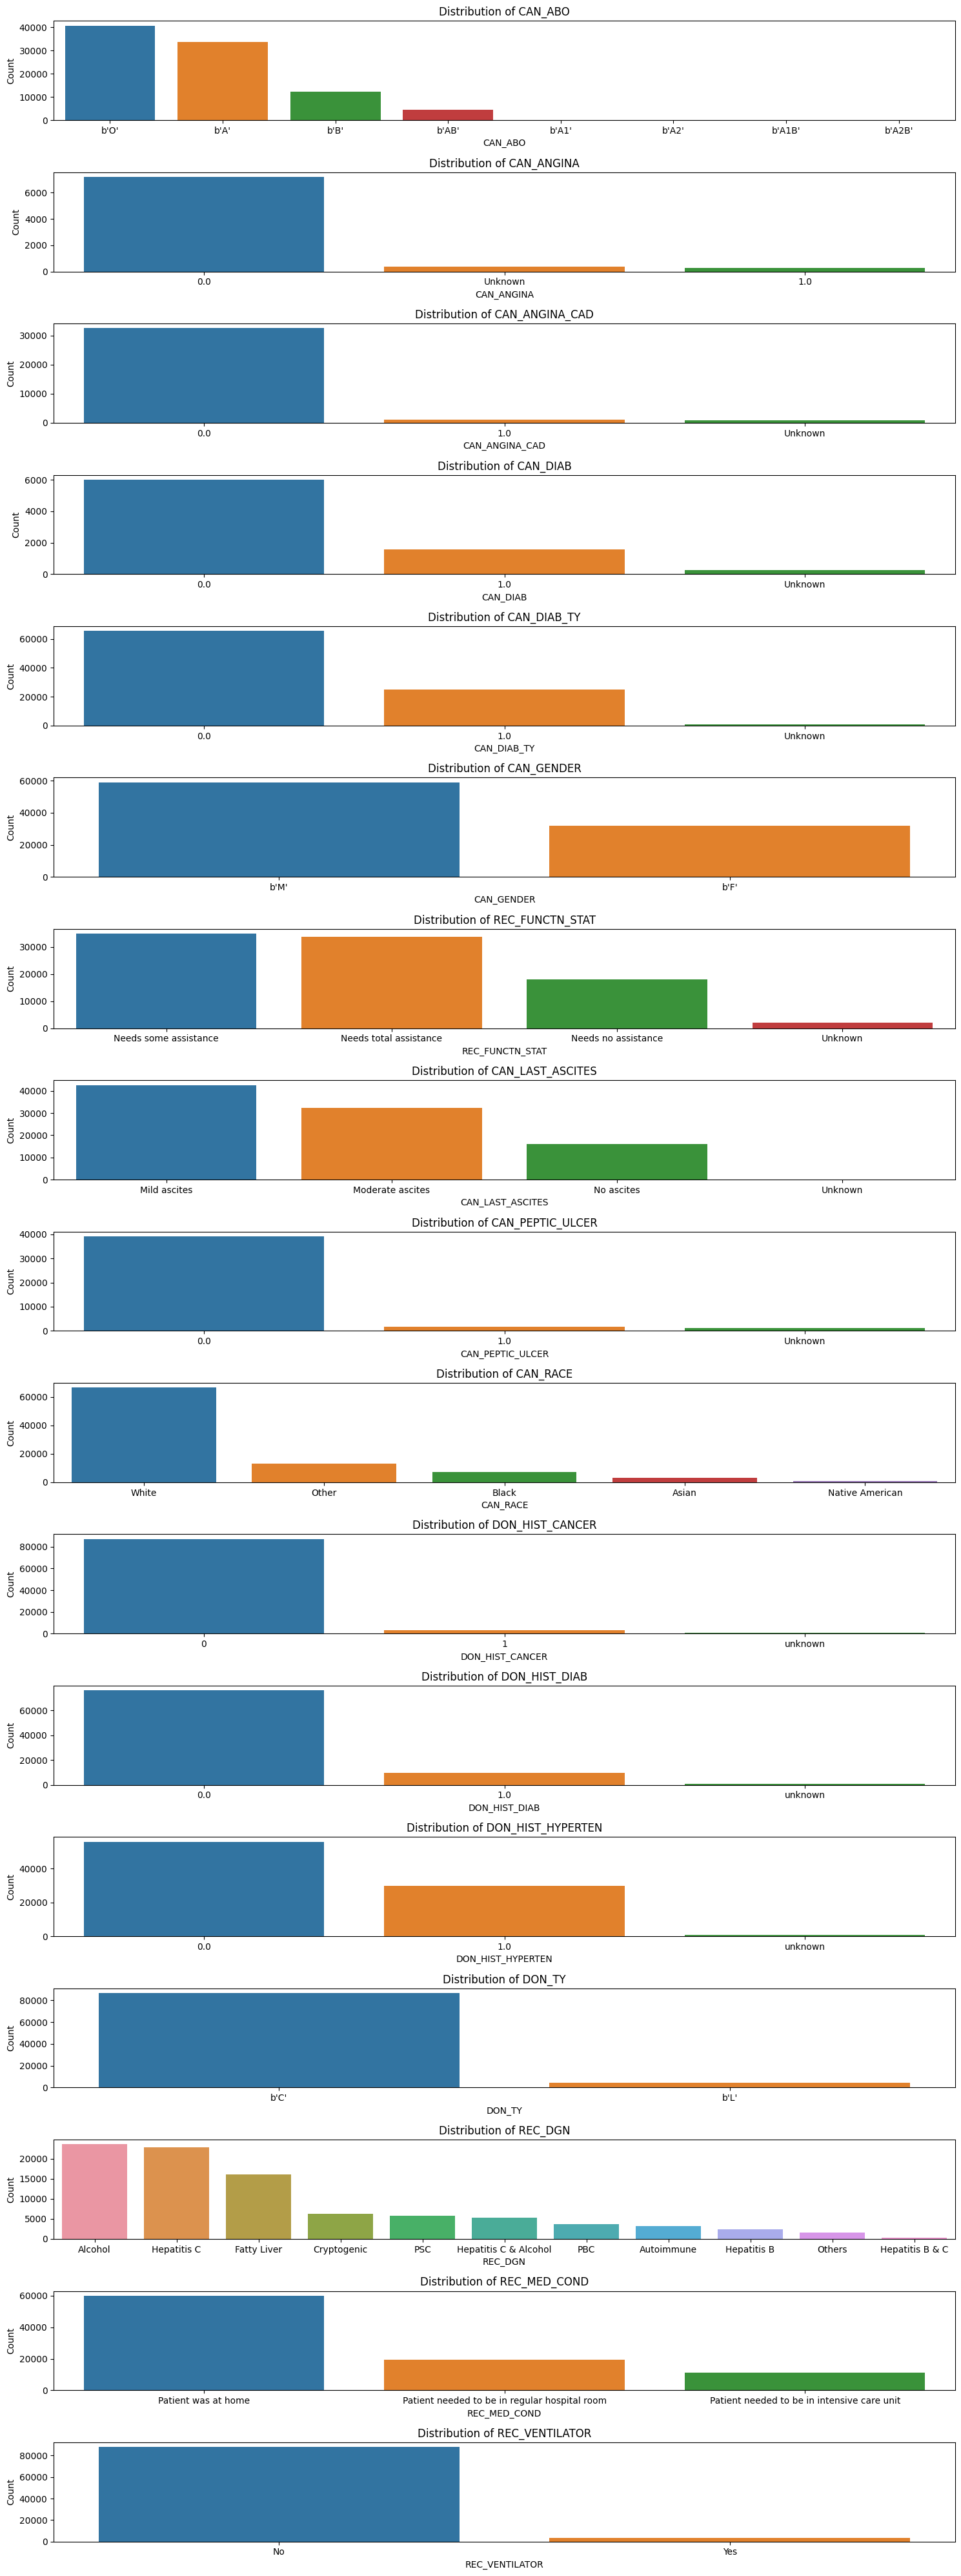

In [18]:
#exploring categorical data
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables to visualize
categorical_vars = [
    'CAN_ABO', 'CAN_ANGINA', 'CAN_ANGINA_CAD', 'CAN_DIAB', 'CAN_DIAB_TY', 'CAN_GENDER', 'REC_FUNCTN_STAT',
    'CAN_LAST_ASCITES', 'CAN_PEPTIC_ULCER', 'CAN_RACE', 'DON_HIST_CANCER', 'DON_HIST_DIAB',
    'DON_HIST_HYPERTEN', 'DON_TY', 'REC_DGN', 'REC_MED_COND', 'REC_VENTILATOR'
]

# Plot bar charts for each variable
plt.figure(figsize=(15, 40))
for idx, var in enumerate(categorical_vars, 1):
    plt.subplot(len(categorical_vars), 1, idx)
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.tight_layout()

plt.show()


In [19]:
#exploring boolean variables

boolean_vars = [
    'CAN_BACTERIA_PERIT', 'CAN_CEREB_VASC', 'CAN_DRUG_TREAT_COPD', 'CAN_DRUG_TREAT_HYPERTEN',
    'CAN_LAST_DIAL_PRIOR_WEEK', 'REC_INOTROP_BP_SUPPORT', 'REC_MALIG', 'CAN_PERIPH_VASC',
    'CAN_PORTAL_VEIN', 'CAN_PREV_ABDOM_SURG', 'CAN_PULM_EMBOL', 'CAN_TIPSS', 'DON_MEET_CDC_HIGH_RISK',
    'REC_PORTAL_HYPERTEN_BLEED', 'REC_VARICEAL_BLEEDING'
]

# Generate frequency tables for each boolean variable
freq_tables_boolean = {}
for var in boolean_vars:
    freq_table = df[var].value_counts(normalize=True) * 100
    freq_tables_boolean[var] = freq_table

freq_tables_boolean


{'CAN_BACTERIA_PERIT': b'N'    89.028392
 b'Y'     9.327568
 b'U'     1.644040
 Name: CAN_BACTERIA_PERIT, dtype: float64,
 'CAN_CEREB_VASC': b'N'    97.010199
 b'U'     2.177153
 b'Y'     0.812648
 Name: CAN_CEREB_VASC, dtype: float64,
 'CAN_DRUG_TREAT_COPD': b'N'    95.756049
 b'Y'     2.130214
 b'U'     2.113737
 Name: CAN_DRUG_TREAT_COPD, dtype: float64,
 'CAN_DRUG_TREAT_HYPERTEN': b'N'    73.173305
 b'Y'    24.398134
 b'U'     2.428561
 Name: CAN_DRUG_TREAT_HYPERTEN, dtype: float64,
 'CAN_LAST_DIAL_PRIOR_WEEK': b'N'    85.088711
 b'Y'    14.758775
 b'A'     0.152514
 Name: CAN_LAST_DIAL_PRIOR_WEEK, dtype: float64,
 'REC_INOTROP_BP_SUPPORT': b'N'    92.481618
 b'U'     4.062500
 b'Y'     3.455882
 Name: REC_INOTROP_BP_SUPPORT, dtype: float64,
 'REC_MALIG': b'N'    93.678025
 b'Y'     4.208193
 b'U'     2.113783
 Name: REC_MALIG, dtype: float64,
 'CAN_PERIPH_VASC': b'N'    96.592710
 b'U'     2.262981
 b'Y'     1.144309
 Name: CAN_PERIPH_VASC, dtype: float64,
 'CAN_PORTAL_VEIN': b'N'

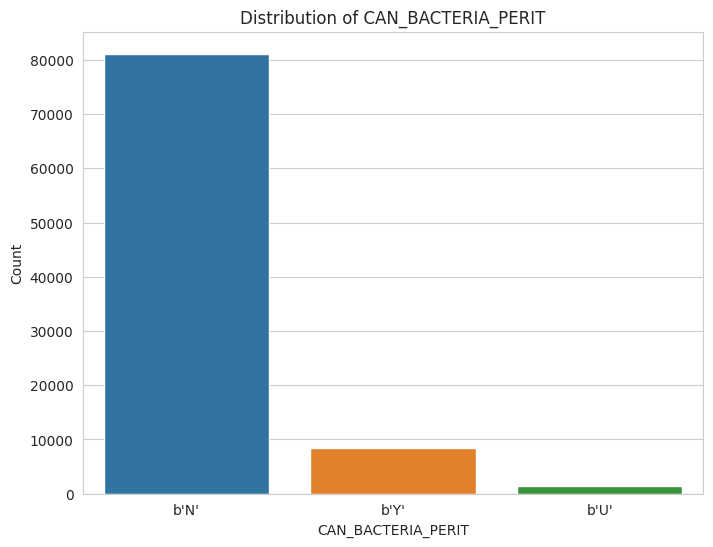

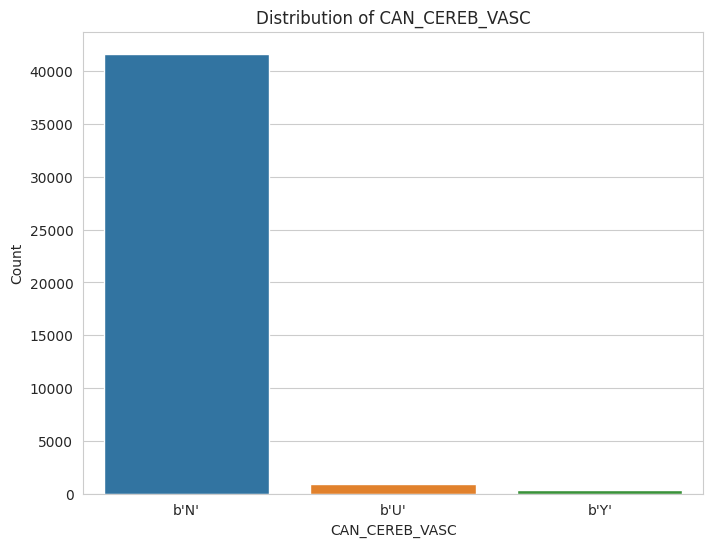

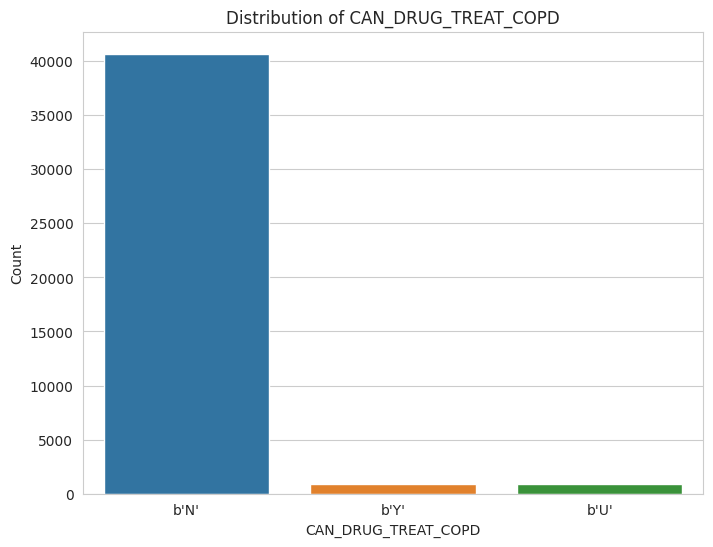

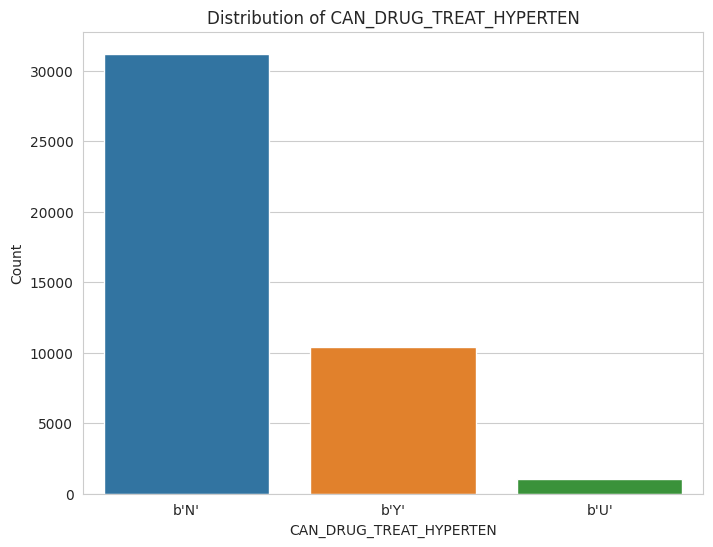

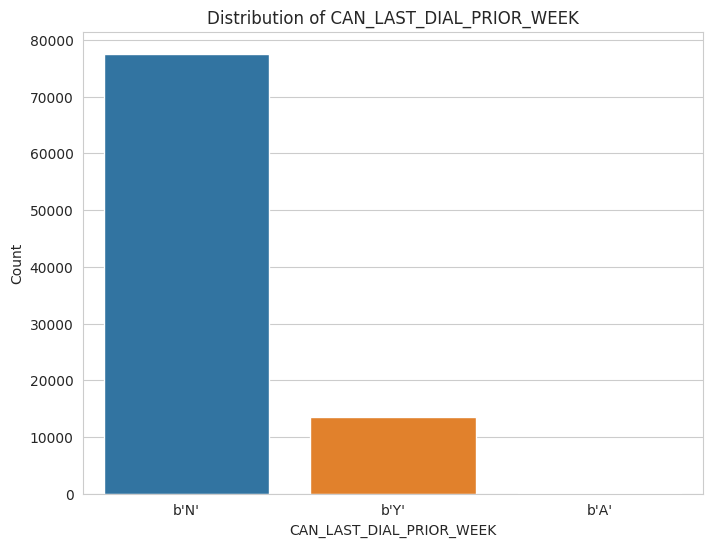

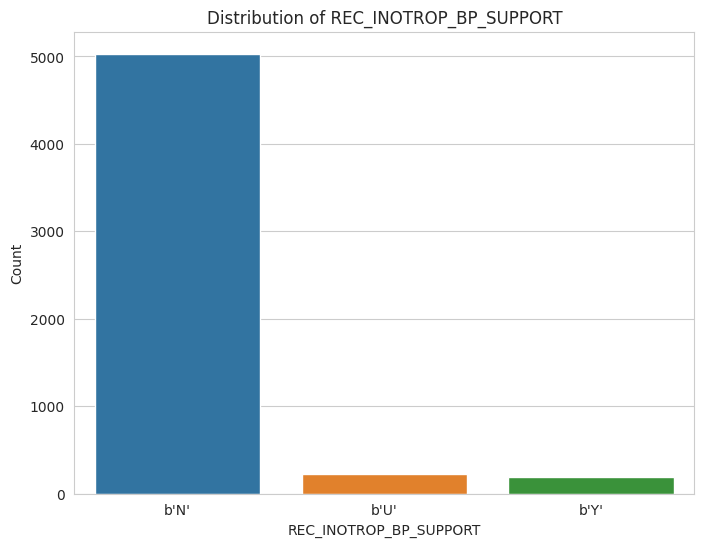

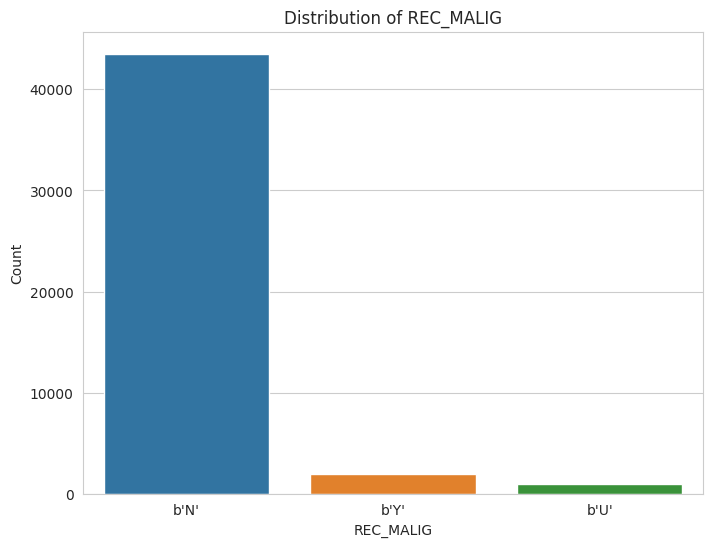

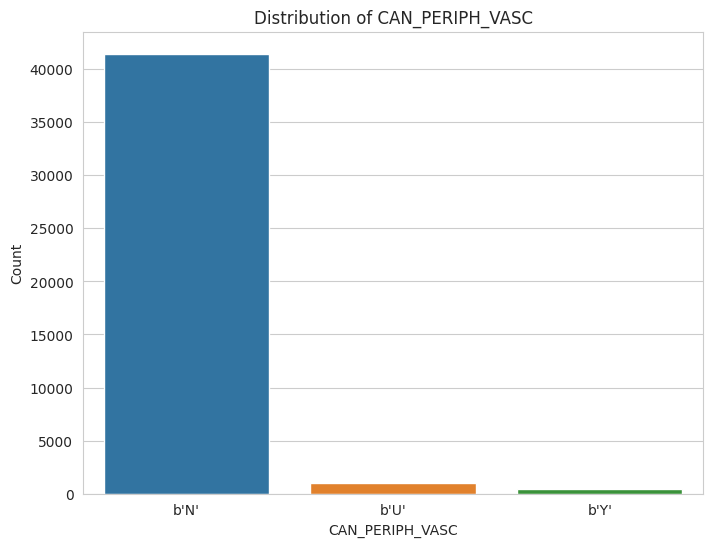

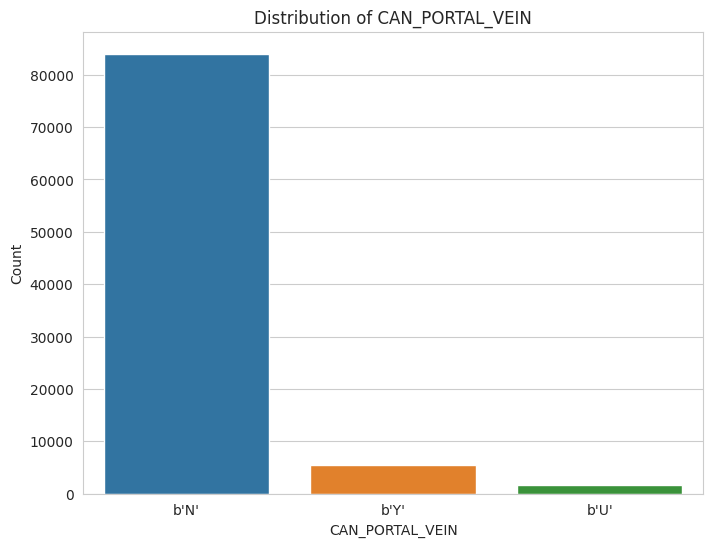

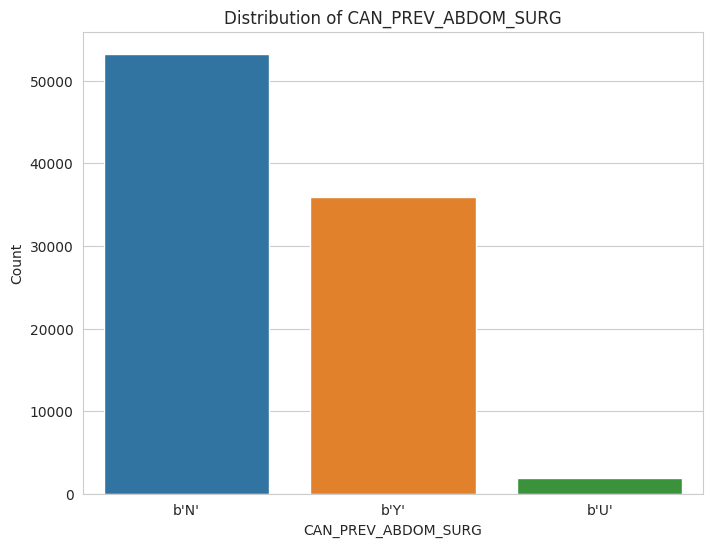

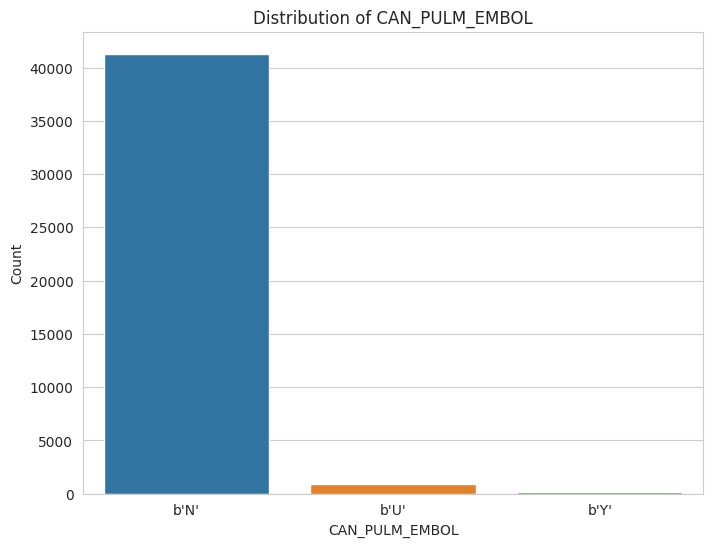

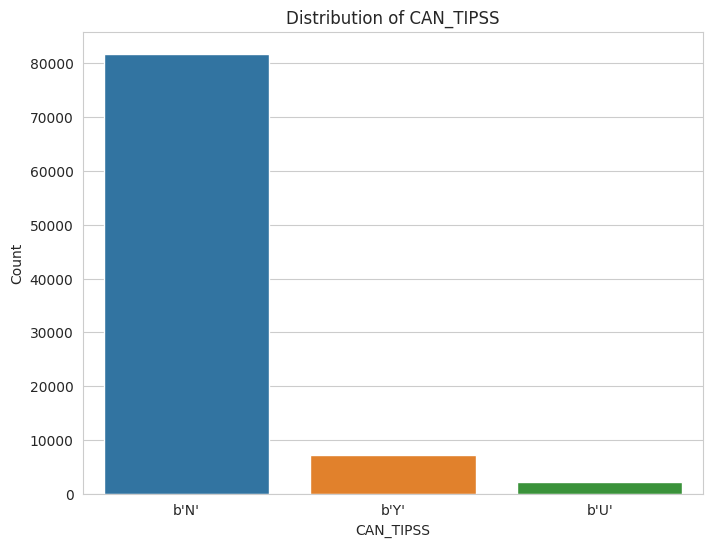

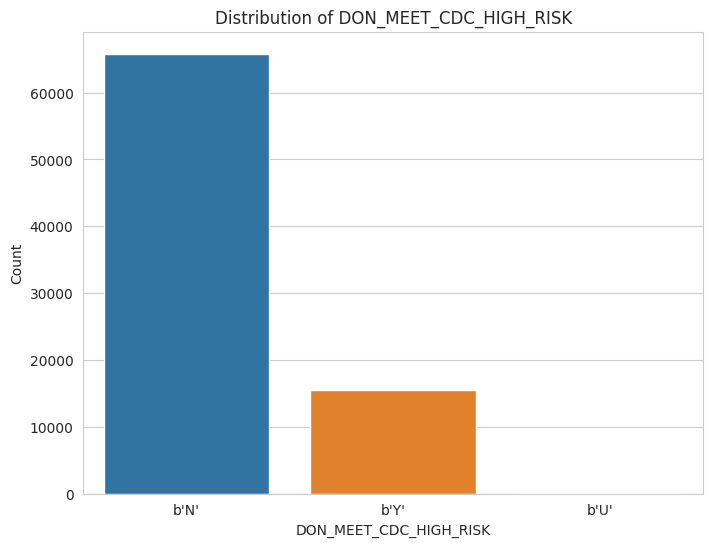

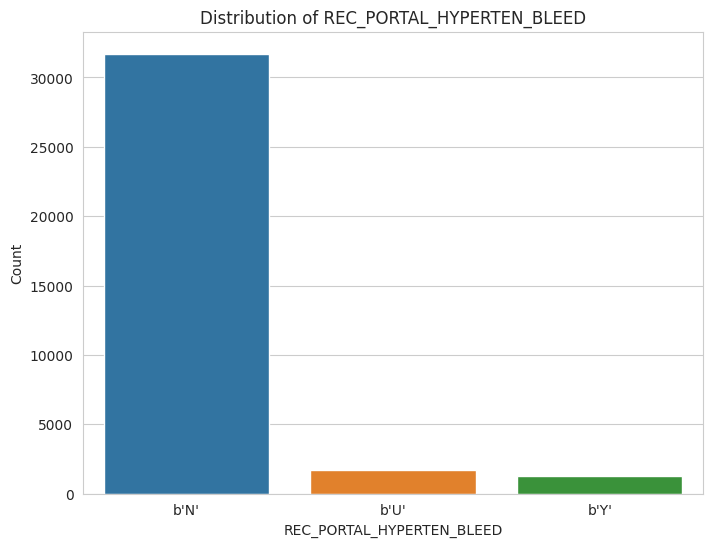

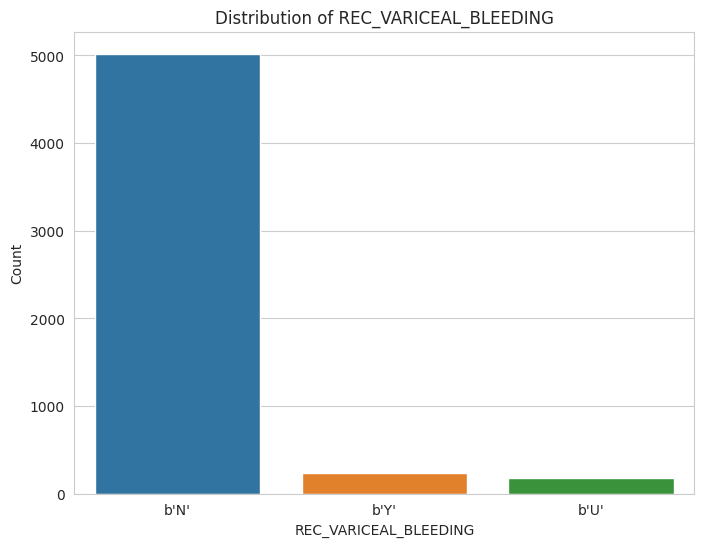

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for each boolean variable
for var in boolean_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.ylabel('Count')
    plt.show()


In [21]:
# List of continuous variables to explore
continuous_vars = [
    'REC_AGE_AT_TX', 'CAN_HGT_CM', 'CAN_LAST_ALBUMIN', 'CAN_LAST_BILI', 'CAN_LAST_INR',
    'CAN_LAST_SERUM_CREAT', 'CAN_LAST_SERUM_SODIUM', 'CAN_WGT_KG', 'DON_AGE_IN_MONTHS',
    'DON_WARM_ISCH_TM_MINS', 'DON_WGT_KG', 'CAN_LAST_SRTR_LAB_MELD'
]

# Generate descriptive statistics for each continuous variable
descriptive_stats = df[continuous_vars].describe()
descriptive_stats


REC_AGE_AT_TX    CAN_HGT_CM  CAN_LAST_ALBUMIN  CAN_LAST_BILI  \
count   91139.000000  90950.000000      91138.000000   91138.000000   
mean       54.868783    171.908207          3.057631       8.818906   
std        10.043827     10.382609          0.713779      10.762967   
min        18.000000      1.600000          0.500000       0.060000   
25%        49.000000    165.100000          2.600000       2.100000   
50%        56.000000    172.720000          3.000000       4.300000   
75%        62.000000    180.300000          3.500000      10.800000   
max        81.000000    225.000000          9.900000      99.000000   

       CAN_LAST_INR  CAN_LAST_SERUM_CREAT  CAN_LAST_SERUM_SODIUM  \
count  91138.000000          91138.000000           83837.000000   
mean       1.960494              1.620674             135.325992   
std        1.193167              1.385345               5.231485   
min        0.500000              0.000000             100.000000   
25%        1.400000              0.800000             132.000000   
50%        1.700000              1.130000             136.000000   
75%        2.290000              1.800000             139.000000   
max       99.000000             26.000000             174.000000   

         CAN_WGT_KG  DON_AGE_IN_MONTHS  DON_WARM_ISCH_TM_MINS    DON_WGT_KG  \
count  91033.000000       91139.000000           23100.000000  91004.000000   
mean      86.366496         500.447624               3.835152     81.546643   
std       20.292143         193.336910               8.712290     20.522946   
min        2.268000          27.000000               0.000000      3.900000   
25%       72.121000         336.000000               0.000000     68.000000   
50%       84.368100         499.000000               0.000000     79.379000   
75%       98.883000         649.000000               0.000000     92.800000   
max      263.000000        1143.000000             175.000000    284.000000   

       CAN_LAST_SRTR_LAB_MELD  
count            91139.000000  
mean                22.883409  
std                  9.485026  
min                  6.000000  
25%                 15.000000  
50%                 22.000000  
75%                 30.000000  
max                 40.000000

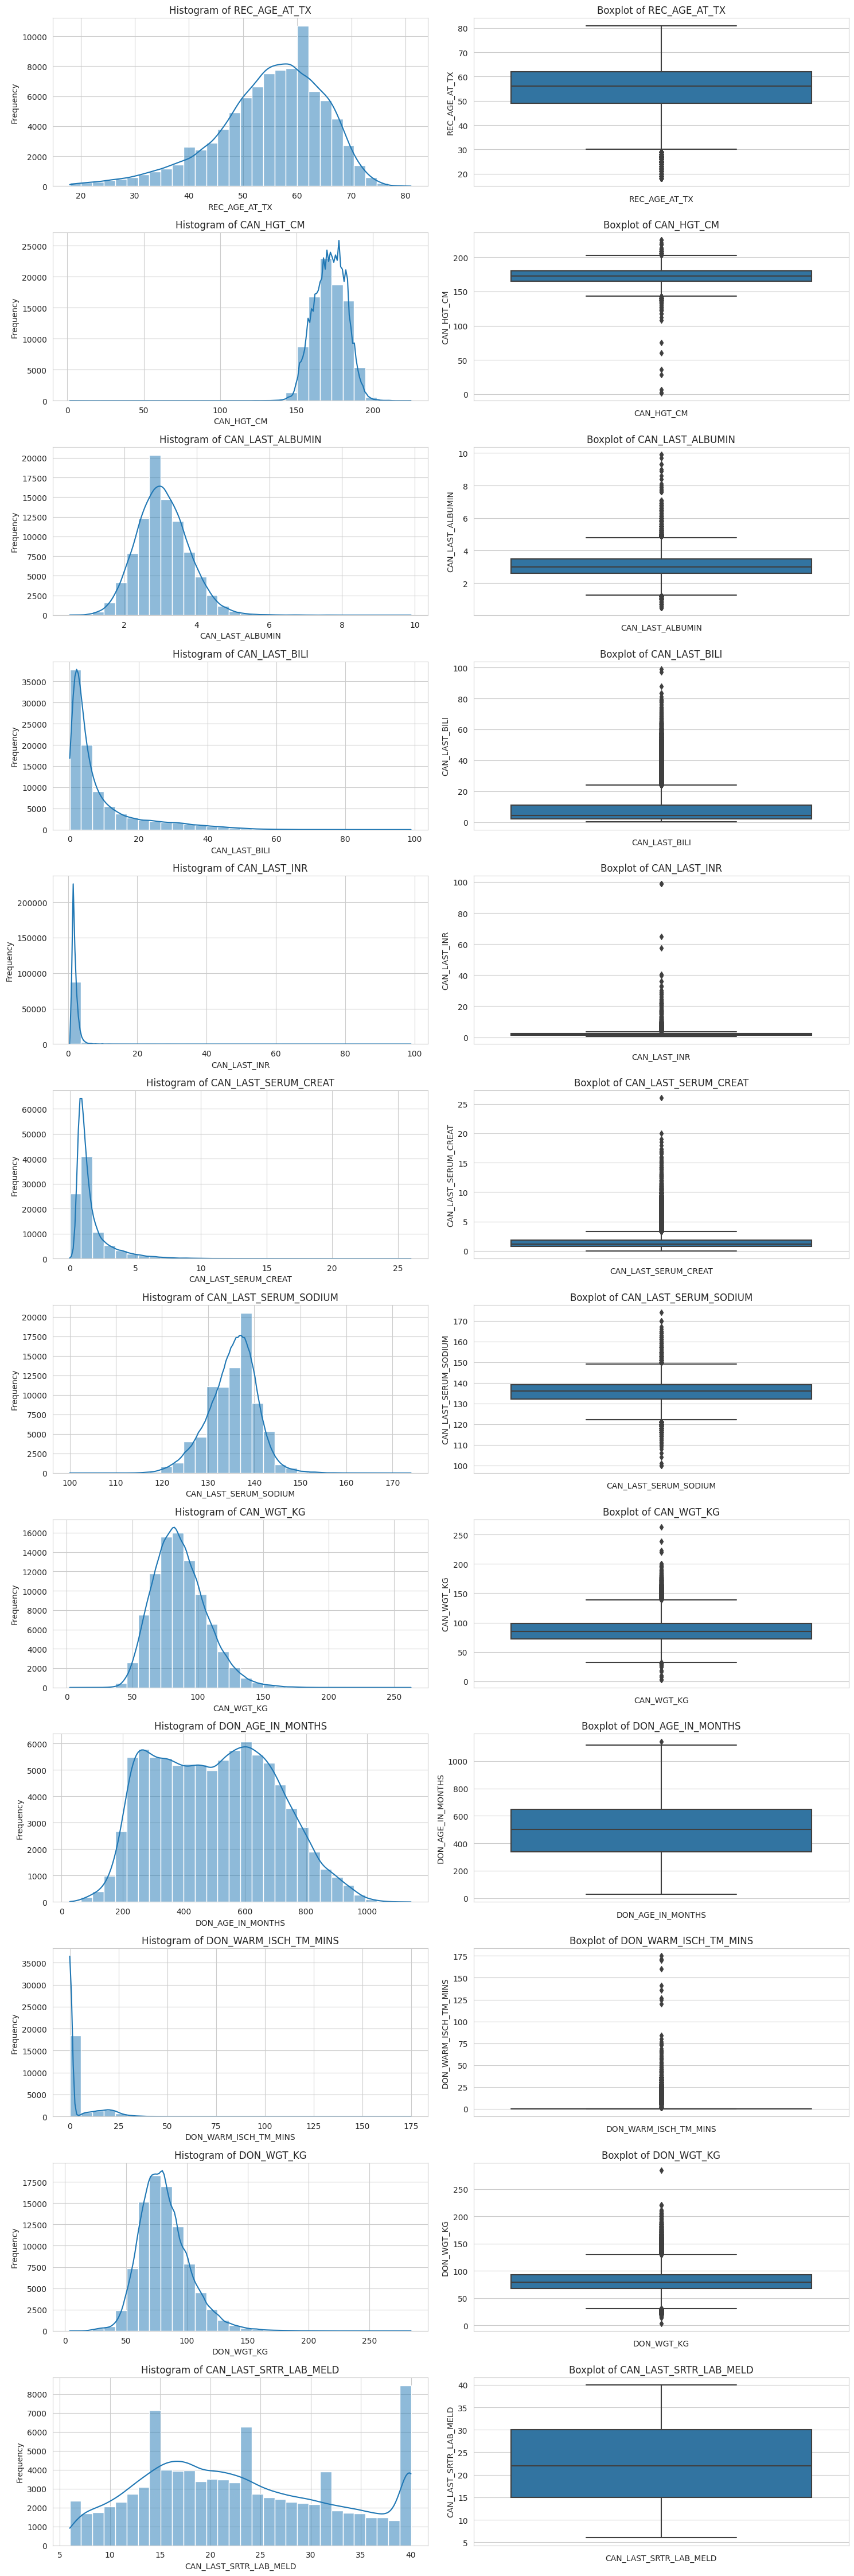

In [22]:
# Plotting histograms and boxplots for each continuous variable

plt.figure(figsize=(15, 45))

for idx, var in enumerate(continuous_vars, 1):
    # Histogram
    plt.subplot(len(continuous_vars), 2, 2*idx-1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(continuous_vars), 2, 2*idx)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()


In [23]:
# Some continous variables do not make physiological sense, they are likely mistakenly inputed. I removed them or capped them based on clinical judgement
df.loc[df['CAN_LAST_SERUM_CREAT'] < 0.3, 'CAN_LAST_SERUM_CREAT'] = 0.3
df.loc[df['CAN_HGT_CM'] < 100, 'CAN_HGT_CM'] = None
df.loc[df['CAN_WGT_KG'] < 40, 'CAN_WGT_KG'] = None
df.loc[df['DON_WGT_KG'] < 40, 'DON_WGT_KG'] = None
df.loc[df['DON_AGE_IN_MONTHS'] < 100, 'DON_AGE_IN_MONTHS'] = None
df.loc[df['CAN_LAST_INR'] > 20, 'CAN_LAST_INR'] = 20
df.loc[df['CAN_LAST_ALBUMIN'] > 7, 'CAN_LAST_ALBUMIN'] = 7

count    91139.000000
mean      2046.427029
std       1801.626218
min          0.000000
25%        486.000000
50%       1514.000000
75%       3209.000000
max       7680.000000
Name: TX_SURV, dtype: float64


Text(0, 0.5, 'Frequency')

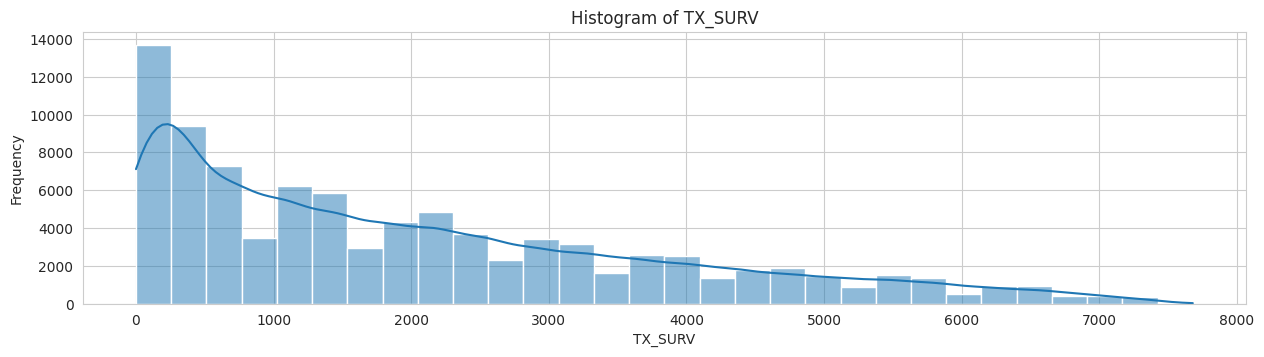

In [25]:
#Post transplant survival description, which is our outcome
# Generate descriptive statistics for the TX_SURV variable
descriptive_stats_TX_SURV = df['TX_SURV'].describe()
print(descriptive_stats_TX_SURV)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram, boxplot, and density plot for TX_SURV

plt.figure(figsize=(15, 12))

# Histogram
plt.subplot(3, 1, 1)
sns.histplot(df['TX_SURV'], kde=True, bins=30)
plt.title('Histogram of TX_SURV')
plt.xlabel('TX_SURV')
plt.ylabel('Frequency')


In [26]:
#how many patietns died within 1, 3 and 5 years after liver transplantation: this will be our outcome
count_365 = (df['TX_SURV'] < 365).sum()
count_1095 = (df['TX_SURV'] < 1095).sum()
count_1836 = (df['TX_SURV'] < 1836).sum()

print("Number of patients with TX_SURV < 365:", count_365)
print("Number of patients with TX_SURV < 1095:", count_1095)
print("Number of patients with TX_SURV < 1836:", count_1836)

Number of patients with TX_SURV < 365: 18119
Number of patients with TX_SURV < 1095: 36597
Number of patients with TX_SURV < 1836: 50726


In [27]:
# Describing the causes of death
# Generate frequency and percentage for the TFL_COD categorical variable
category_counts = df['TFL_COD'].value_counts()
category_percentage = df['TFL_COD'].value_counts(normalize=True) * 100

# Combine counts and percentages into one dataframe for a better view
descriptive_stats_TFL_COD = pd.DataFrame({
    'Counts': category_counts,
    'Percentage (%)': category_percentage
})

print(descriptive_stats_TFL_COD)


                     Counts  Percentage (%)
Unknown                5581       21.891425
Malignancy             3310       12.983447
Infection              3064       12.018514
Cardiovascular         3017       11.834157
Other                  2936       11.516435
Graft failure          2088        8.190162
MOF                    1983        7.778301
Respiratory failure    1394        5.467953
Cerebrovascular         774        3.036008
Renal failure           526        2.063231
Bleeding                376        1.474857
Trauma                  172        0.674669
GI bleeding             103        0.404017
PE                       91        0.356947
Suicide                  79        0.309877


In [75]:
df[df['CAN_ANGINA'].notnull() ]['CAN_ANGINA']

210       0.0
819       0.0
1199      0.0
4178      0.0
4982      0.0
         ... 
135089    0.0
135226    0.0
135315    0.0
135366    0.0
135485    0.0
Name: CAN_ANGINA, Length: 7866, dtype: object

In [79]:
df['CAN_ANGINA'] = df['CAN_ANGINA'].apply(lambda x: int(x) if x in [0.0, 1.0] else np.nan)
df['CAN_ANGINA'].unique()

array([nan,  0.,  1.])

In [83]:
df['CAN_ANGINA_CAD'] = df['CAN_ANGINA_CAD'].apply(lambda x: int(x) if x in [0.0, 1.0] else np.nan)
df['CAN_ANGINA_CAD'].unique()

array([ 0., nan,  1.])

In [87]:
df['CAN_DIAB'] = df['CAN_DIAB'].apply(lambda x: int(x) if x in [0.0, 1.0] else np.nan)
df['CAN_DIAB'].unique()

array([nan,  0.,  1.])

In [90]:
df['CAN_DIAB_TY'] = df['CAN_DIAB_TY'].apply(lambda x: int(x) if x in [0.0, 1.0] else np.nan)
df['CAN_DIAB_TY'].unique()

array([ 0.,  1., nan])

In [99]:
df['CAN_PEPTIC_ULCER'] = df['CAN_PEPTIC_ULCER'].apply(lambda x: int(x) if x in [0.0, 1.0] else np.nan)
df['DON_HIST_CANCER'] = df['DON_HIST_CANCER'].apply(lambda x: int(x) if x in [0.0, 1.0] else np.nan)
df['DON_HIST_DIAB'] = df['DON_HIST_DIAB'].apply(lambda x: int(x) if x in [0.0, 1.0] else np.nan)
df['CAN_PEPTIC_ULCER'].unique()
df['DON_HIST_CANCER'].unique()
df['DON_HIST_DIAB'].unique()

array([ 0.,  1., nan])

In [103]:
df['DON_HIST_HYPERTEN'] = df['DON_HIST_HYPERTEN'].apply(lambda x: int(x) if x in [0.0, 1.0] else np.nan)
df['DON_HIST_HYPERTEN'].unique()

array([ 0.,  1., nan])

In [109]:
df['DON_HIST_HYPERTEN'].unique()

array([ 0.,  1., nan])

In [130]:

df['REC_FUNCTN_STAT'].fillna('Unknown', inplace=True)
df['REC_FUNCTN_STAT'].unique()

array(['Needs some assistance', 'Needs total assistance',
       'Needs no assistance', 'Unknown'], dtype=object)

In [131]:
df['CAN_LAST_ASCITES'].fillna('Unknown', inplace=True)
df['CAN_LAST_ASCITES'].unique()

array(['Mild ascites', 'Moderate ascites', 'No ascites', 'Unknown'],
      dtype=object)

In [132]:
cat_onehot_cols = [
    #these are boolean
    'CAN_BACTERIA_PERIT', 'CAN_CEREB_VASC', 'CAN_DRUG_TREAT_COPD', 'CAN_DRUG_TREAT_HYPERTEN',
    'CAN_LAST_DIAL_PRIOR_WEEK', 'REC_INOTROP_BP_SUPPORT', 'REC_MALIG', 'CAN_PERIPH_VASC',
    'CAN_PORTAL_VEIN', 'CAN_PREV_ABDOM_SURG', 'CAN_PULM_EMBOL', 'CAN_TIPSS', 'DON_MEET_CDC_HIGH_RISK',
    'REC_PORTAL_HYPERTEN_BLEED', 'REC_VARICEAL_BLEEDING',
     #these are categorical
    'CAN_ABO', 'CAN_ANGINA', 'CAN_ANGINA_CAD', 'CAN_DIAB', 'CAN_DIAB_TY', 'CAN_GENDER',
    'CAN_PEPTIC_ULCER', 'CAN_RACE', 'DON_HIST_CANCER', 'DON_HIST_DIAB',
    'DON_HIST_HYPERTEN', 'DON_TY', 'REC_DGN', 'REC_MED_COND', 'REC_VENTILATOR', 'TFL_COD'
    ]

#these are continous
continuous_cols = ['REC_AGE_AT_TX', 'CAN_HGT_CM', 'CAN_LAST_ALBUMIN', 'CAN_LAST_BILI', 'CAN_LAST_INR',
    'CAN_LAST_SERUM_CREAT', 'CAN_LAST_SERUM_SODIUM', 'CAN_WGT_KG', 'DON_AGE_IN_MONTHS',
    'DON_WARM_ISCH_TM_MINS', 'DON_WGT_KG', 'CAN_LAST_SRTR_LAB_MELD', 'TX_SURV']

# these 2 are better defined as ordinal:
cat_ordinal_cols = [ 'REC_FUNCTN_STAT', 'CAN_LAST_ASCITES']

In [ ]:
!pip install shap pyod lightgbm prince

In [133]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import shap

# sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report

from pyod.models.ecod import ECOD
from yellowbrick.cluster import KElbowVisualizer

import lightgbm as lgb
import prince

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import TransformerMixin

class NanMeanImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.mean = X.mean()
        return self

    def transform(self, X):
        return X.fillna(self.mean)

    def get_feature_names_out(self, input_features=None):
        # Return the input features as-is, as there are no new features added
        return input_features

categorical_transformer_onehot = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False))
    ])

categorical_transformer_ordinal = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder())
    ])

num = Pipeline(
    steps=[
        ("imputer", NanMeanImputer()),
        ("encoder", PowerTransformer())
    ])


preprocessor  = ColumnTransformer(transformers = [
                                        ('cat_onehot', categorical_transformer_onehot, cat_onehot_cols),
                                        ('cat_ordinal', categorical_transformer_ordinal, cat_ordinal_cols),
                                        ('num', num, continuous_cols)
                                        ])

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor)]
    )
pipe_fit = pipeline.fit(df)

data = pd.DataFrame(pipe_fit.transform(df), columns = pipe_fit.get_feature_names_out().tolist())

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [112]:
data.columns.tolist()

["cat_onehot__CAN_BACTERIA_PERIT_b'U'",
 "cat_onehot__CAN_BACTERIA_PERIT_b'Y'",
 'cat_onehot__CAN_BACTERIA_PERIT_nan',
 "cat_onehot__CAN_CEREB_VASC_b'U'",
 "cat_onehot__CAN_CEREB_VASC_b'Y'",
 'cat_onehot__CAN_CEREB_VASC_nan',
 "cat_onehot__CAN_DRUG_TREAT_COPD_b'U'",
 "cat_onehot__CAN_DRUG_TREAT_COPD_b'Y'",
 'cat_onehot__CAN_DRUG_TREAT_COPD_nan',
 "cat_onehot__CAN_DRUG_TREAT_HYPERTEN_b'U'",
 "cat_onehot__CAN_DRUG_TREAT_HYPERTEN_b'Y'",
 'cat_onehot__CAN_DRUG_TREAT_HYPERTEN_nan',
 "cat_onehot__CAN_LAST_DIAL_PRIOR_WEEK_b'N'",
 "cat_onehot__CAN_LAST_DIAL_PRIOR_WEEK_b'Y'",
 "cat_onehot__REC_INOTROP_BP_SUPPORT_b'U'",
 "cat_onehot__REC_INOTROP_BP_SUPPORT_b'Y'",
 'cat_onehot__REC_INOTROP_BP_SUPPORT_nan',
 "cat_onehot__REC_MALIG_b'U'",
 "cat_onehot__REC_MALIG_b'Y'",
 'cat_onehot__REC_MALIG_nan',
 "cat_onehot__CAN_PERIPH_VASC_b'U'",
 "cat_onehot__CAN_PERIPH_VASC_b'Y'",
 'cat_onehot__CAN_PERIPH_VASC_nan',
 "cat_onehot__CAN_PORTAL_VEIN_b'U'",
 "cat_onehot__CAN_PORTAL_VEIN_b'Y'",
 'cat_onehot__CAN_P

## Outliers

In [135]:
# the columns that contain NaN values
data.columns[data.isna().any()]

Index(['num__CAN_HGT_CM', 'num__CAN_LAST_ALBUMIN', 'num__CAN_LAST_BILI',
       'num__CAN_LAST_INR', 'num__CAN_LAST_SERUM_CREAT',
       'num__CAN_LAST_SERUM_SODIUM', 'num__CAN_WGT_KG',
       'num__DON_AGE_IN_MONTHS', 'num__DON_WARM_ISCH_TM_MINS',
       'num__DON_WGT_KG'],
      dtype='object')

In [141]:
clf = ECOD()
clf.fit(data)
outliers = clf.predict(data)

data["outliers"] = outliers
df["outliers"] = outliers

# Data without outliers
data_no_outliers = data[data["outliers"] == 0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)

# Data with Outliers
data_with_outliers = data.copy()
data_with_outliers = data_with_outliers.drop(["outliers"], axis = 1)

# Original Data with Outliers
df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)

In [142]:
print(data_no_outliers.shape)
print(data_with_outliers.shape)
print(df_no_outliers.shape)

(82025, 118)
(91139, 118)
(82025, 50)


In [143]:
data_no_outliers

cat_onehot__CAN_BACTERIA_PERIT_b'U'  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
91134                                  0.0   
91135                                  0.0   
91136                                  0.0   
91137                                  0.0   
91138                                  0.0   

       cat_onehot__CAN_BACTERIA_PERIT_b'Y'  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
91134                                  0.0   
91135                                  0.0   
91136                                  0.0   
91137                                  0.0   
91138                                  0.0   

       cat_onehot__CAN_BACTERIA_PERIT_nan  cat_onehot__CAN_CEREB_VASC_b'U'  \
0                                     0.0                              0.0   
1                                     0.0                              0.0   
2                                     0.0                              0.0   
3                                     0.0                              0.0   
4                                     0.0                              0.0   
...                                   ...                              ...   
91134                                 0.0                              0.0   
91135                                 0.0                              0.0   
91136                                 0.0                              0.0   
91137                                 0.0                              0.0   
91138                                 0.0                              0.0   

       cat_onehot__CAN_CEREB_VASC_b'Y'  cat_onehot__CAN_CEREB_VASC_nan  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                             0.0   
...                                ...                             ...   
91134                              0.0                             0.0   
91135                              0.0                             1.0   
91136                              0.0                             0.0   
91137                              0.0                             0.0   
91138                              0.0                             0.0   

       cat_onehot__CAN_DRUG_TREAT_COPD_b'U'  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
91134                                   0.0   
91135                                   0.0   
91136                                   0.0   
91137                                   0.0   
91138                                   0.0   

       cat_onehot__CAN_DRUG_TREAT_COPD_b'Y'  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
91134                                   0.0   
91135                                   0.0   
91136                                   0.0   
91137                                   

## Modeling

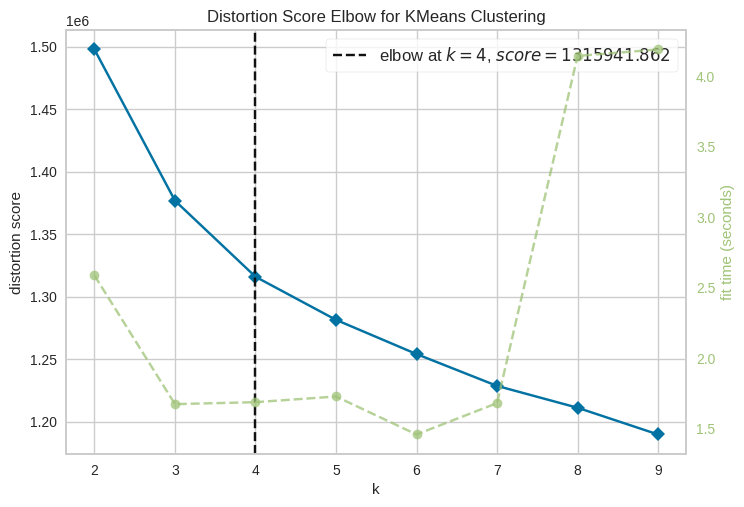

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [144]:
# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(data_no_outliers)        # Fit the data to the visualizer
visualizer.show()

## The best number is 4-5

In [145]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100, random_state=42)
clusters_predict = km.fit_predict(data_no_outliers)
print(km.inertia_)

1281437.4033410936


In [146]:
np.unique(clusters_predict)

array([0, 1, 2, 3, 4], dtype=int32)

# Evaluation

In [147]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that produces better clusters.
"""
print(f"Davies bouldin score: {davies_bouldin_score(data_no_outliers,clusters_predict)}")

"""
Calinski Harabaz Index -> Variance Ratio Criterion.
Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(data_no_outliers,clusters_predict)}")


"""
The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as a method for determining an optimal value of k (see here for more).
Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
1 is the ideal value and indicates that clusters are very dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(data_no_outliers,clusters_predict)}")

Davies bouldin score: 2.9599655613306792
Calinski Score: 6196.156091782913
Silhouette Score: 0.07531248549705376


## Visualitation

In [148]:
def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()

    fig = px.scatter_3d(df,
                        x=columns[0],
                        y=columns[1],
                        z=columns[2],
                        color='cluster',
                        template="plotly",

                        # symbol = "cluster",

                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 4,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 1000,
                                height = 800,
                                autosize = False,
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))


    fig.show()


def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()


    fig = px.scatter(df,
                        x=columns[0],
                        y=columns[1],
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",

                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800,
                                height = 700,
                                autosize = False,
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))


    fig.show()


## PCA 3D

In [149]:
pca_3d_object, df_pca_3d = get_pca_3d(data_no_outliers, clusters_predict)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)

The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              9.360         8.21%                      8.21%
1              4.789         4.20%                     12.41%
2              3.727         3.27%                     15.68%


## PCA 2D

In [150]:
pca_2d_object, df_pca_2d = get_pca_2d(data_no_outliers, clusters_predict)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.5)

## T-SNE
### TSNE 3D

In [151]:
sampling_data = data_no_outliers.sample(frac=0.5, replace=True, random_state=1)
sampling_clusters = pd.DataFrame(clusters_predict).sample(frac=0.5, replace=True, random_state=1)[0].values

df_tsne_3d = TSNE(
                  n_components=3,
                  learning_rate=700,
                  init='random',
                  perplexity=100,
                  n_iter = 1000).fit_transform(sampling_data)

df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["comp1", "comp2",'comp3'])
df_tsne_3d["cluster"] = sampling_clusters
plot_pca_3d(df_tsne_3d, title = "PCA Space", opacity=1, width_line = 0.1)

ValueError: ignored

In [152]:
plot_pca_3d(df_tsne_3d, title = "PCA Space", opacity=0.3, width_line = 0.1)

NameError: ignored

## TSNE 2D

In [153]:
df_tsne_2d = TSNE(
                  n_components=2,
                  learning_rate=500,
                  init='random',
                  perplexity=200,
                  n_iter = 5000).fit_transform(sampling_data)

df_tsne_2d = pd.DataFrame(df_tsne_2d, columns=["comp1", "comp2"])
df_tsne_2d["cluster"] = sampling_clusters

plot_pca_2d(df_tsne_2d, title = "PCA Space", opacity=1, width_line = 0.5)


ValueError: ignored

## Explanations

In [ ]:
data_no_outliers

In [ ]:
import lightgbm as lgb
import shap


clf_km = lgb.LGBMClassifier(colsample_by_tree=0.8)



for col in ["job", "marital", "education", "housing", "loan", "default"]:
    df_no_outliers[col] = df_no_outliers[col].astype('category')


clf_km.fit(X = df_no_outliers , y = clusters_predict, feature_name = "auto", categorical_feature = "auto")
# clf_km.fit(X = df_prueba, y = predict_embedding, feature_name='auto', categorical_feature = 'auto')
#SHAP values
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(df_no_outliers)
shap.summary_plot(shap_values_km, df_no_outliers, plot_type="bar", plot_size=(15, 10))